# **Домашняя работа 2**

# Кусаинова Асем


In [1]:
import pandas as pd

# **World Happiness dataset**


Задание 1. Склеить 3 файла по годам


In [2]:
file2015 = pd.read_csv('2015.csv')
file2016 = pd.read_csv('2016.csv')
file2017 = pd.read_csv('2017.csv')

In [3]:
file2017 = file2017.rename(columns={"Happiness.Rank": "Happiness Rank", "Happiness.Score": "Happiness Score",
                   "Economy..GDP.per.Capita.": "Economy (GDP per Capita)",
                   "Health..Life.Expectancy.": "Health (Life Expectancy)",
                   "Trust..Government.Corruption.": "Trust (Government Corruption)",
                   "Dystopia.Residual": "Dystopia Residual"})

In [4]:
year = []
for i in range(len(file2015.values)):
  year.append(2015)
file2015['Year'] = year

In [5]:
year = []
for i in range(len(file2016.values)):
  year.append(2016)
file2016['Year'] = year

In [6]:
year = []
for i in range(len(file2017.values)):
  year.append(2017)
file2017['Year'] = year

In [7]:
merged_total = pd.concat([file2015, file2016])
total = pd.concat([merged_total, file2017])

In [8]:
total

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,NaN,NaN,3.543030,3.398970
151,Syria,NaN,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,NaN,NaN,3.663669,3.260331
152,Tanzania,NaN,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,NaN,NaN,3.461430,3.236570
153,Burundi,NaN,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,NaN,NaN,3.074690,2.735310


Задание 2. Вывести информацию по топ 25 странам с наибольшим абсолютным изменением индекса счастья

In [9]:
out = []
for i, df in total.groupby('Country'):
  diff = abs(df['Happiness Score'].values[-1] - df['Happiness Score'].values[0])
  out.append([i, diff])
out = sorted(out, key=lambda x: x[1], reverse=True)[0:24]

for i in out:
  print(total[total.Country == i[0]])

      Country                       Region  ...  Whisker.high  Whisker.low
22  Venezuela  Latin America and Caribbean  ...           NaN          NaN
43  Venezuela  Latin America and Caribbean  ...           NaN          NaN
81  Venezuela                          NaN  ...      5.370032     5.129968

[3 rows x 17 columns]
     Country              Region  ...  Whisker.high  Whisker.low
96   Lesotho  Sub-Saharan Africa  ...           NaN          NaN
138  Lesotho                 NaN  ...      4.044344     3.571656

[2 rows x 17 columns]
     Country              Region  ...  Whisker.high  Whisker.low
115  Liberia  Sub-Saharan Africa  ...           NaN          NaN
149  Liberia  Sub-Saharan Africa  ...           NaN          NaN
147  Liberia                 NaN  ...      3.653756     3.412244

[3 rows x 17 columns]
                      Country              Region  ...  Whisker.high  Whisker.low
147  Central African Republic  Sub-Saharan Africa  ...           NaN          NaN
154  Central

Задание 3. Визуализировать эту информацию:

Вывести распределения показателей счастья (Health, Freedom, Trust и т.д.) в том или ином виде, используя Seaborn


In [10]:
import seaborn as sns
import matplotlib.pyplot as figure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

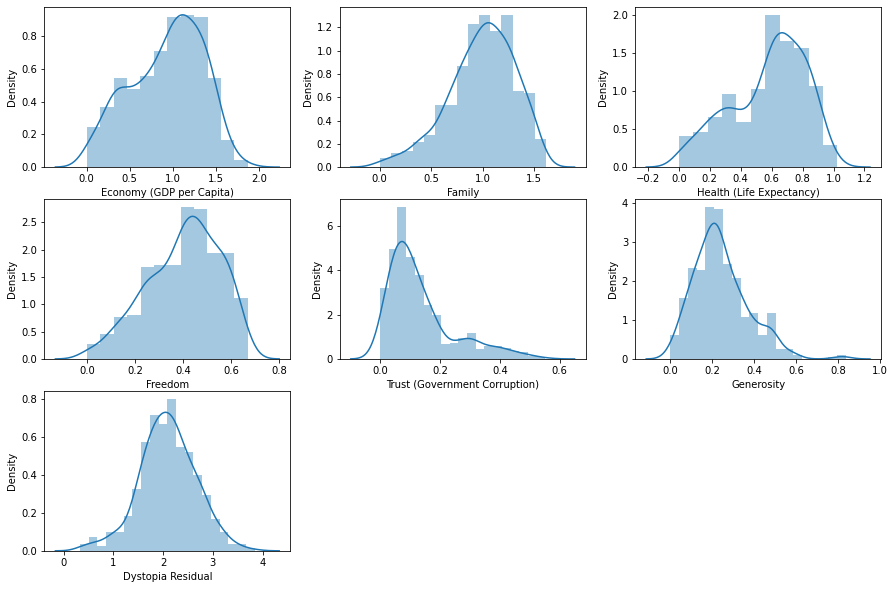

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
sns.distplot(total['Economy (GDP per Capita)'])

plt.subplot(3, 3, 2)
sns.distplot(total['Family'])

plt.subplot(3, 3, 3)
sns.distplot(total['Health (Life Expectancy)'])

plt.subplot(3, 3, 4)
sns.distplot(total['Freedom'])

plt.subplot(3, 3, 5)
sns.distplot(total['Trust (Government Corruption)'])

plt.subplot(3, 3, 6)
sns.distplot(total['Generosity'])

plt.subplot(3, 3, 7)
sns.distplot(total['Dystopia Residual'])

Задание 4. Построить Pairplot показателей счастья по всем странам за определённый год, выявить визуально те показатели, которые наилучшим образом между собой коррелируют (зависят друг от друга)


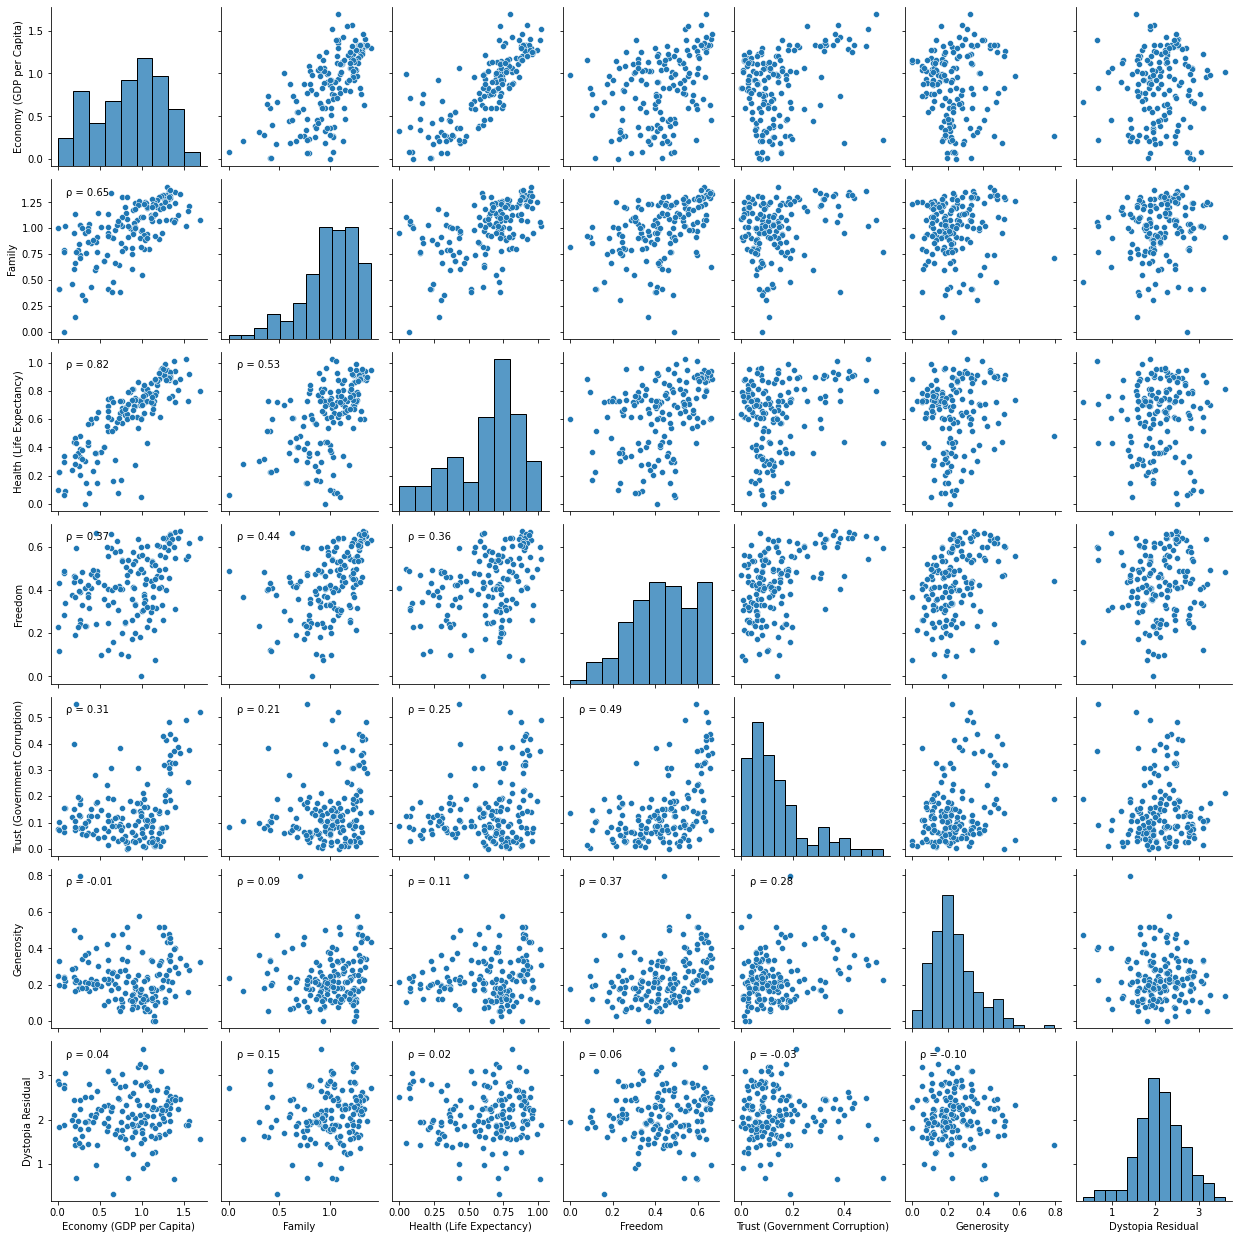

In [12]:
# Наиболее высокие значения корреляции выявлены между показателями счастья 
# ('Economy (GDP per Capita)' и 'Family'), 
# ('Economy (GDP per Capita)' и 'Health (Life Expectancy)'),
# ('Health (Life Expectancy)' и 'Family').

from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

out = sns.pairplot(file2015,
             x_vars = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
             y_vars = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
out.map_lower(corrfunc)
plt.show()

Задание 5. Построить Scatter Plotы зависимости показателей счастья от GDP, построить regression plotы на том же графике, проанализировать страны, которые лежат сильно выше/ниже линии регрессии по различным показателям


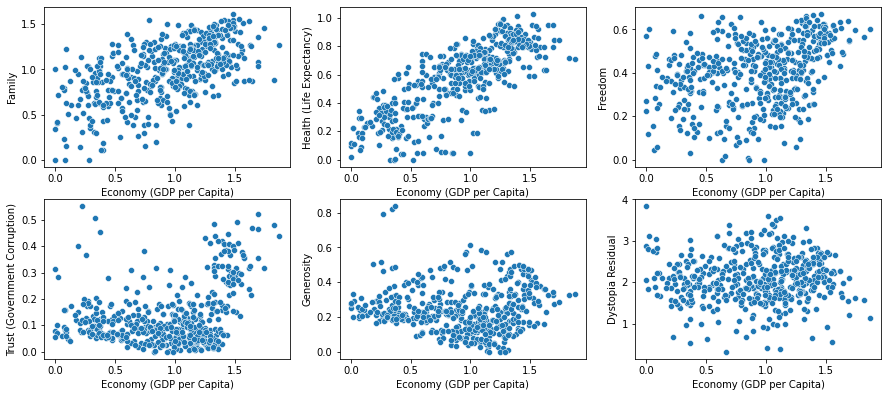

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
sns.scatterplot(total['Economy (GDP per Capita)'], total['Family'])

plt.subplot(3, 3, 2)
sns.scatterplot(total['Economy (GDP per Capita)'], total['Health (Life Expectancy)'])

plt.subplot(3, 3, 3)
sns.scatterplot(total['Economy (GDP per Capita)'], total['Freedom'])

plt.subplot(3, 3, 4)
sns.scatterplot(total['Economy (GDP per Capita)'], total['Trust (Government Corruption)'])

plt.subplot(3, 3, 5)
sns.scatterplot(total['Economy (GDP per Capita)'], total['Generosity'])

plt.subplot(3, 3, 6)
sns.scatterplot(total['Economy (GDP per Capita)'], total['Dystopia Residual'])

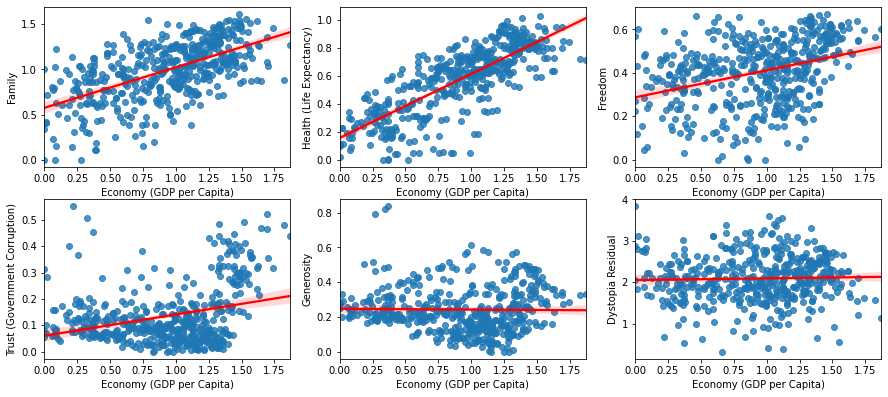

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
sns.regplot(total['Economy (GDP per Capita)'], total['Family'], line_kws={"color": "red"})

plt.subplot(3, 3, 2)
sns.regplot(total['Economy (GDP per Capita)'], total['Health (Life Expectancy)'], line_kws={"color": "red"})

plt.subplot(3, 3, 3)
sns.regplot(total['Economy (GDP per Capita)'], total['Freedom'], line_kws={"color": "red"})

plt.subplot(3, 3, 4)
sns.regplot(total['Economy (GDP per Capita)'], total['Trust (Government Corruption)'], line_kws={"color": "red"})

plt.subplot(3, 3, 5)
sns.regplot(total['Economy (GDP per Capita)'], total['Generosity'], line_kws={"color": "red"})

plt.subplot(3, 3, 6)
sns.regplot(total['Economy (GDP per Capita)'], total['Dystopia Residual'], line_kws={"color": "red"})

# **FIFA 19 dataset**

In [15]:
fifa = pd.read_csv("data.csv")
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [16]:
def changeToNum(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

In [17]:
fifa['Wage'] = fifa['Wage'].apply(changeToNum)

Задание 1. Проанализируйте с помощью Scatter/Regression Plotов

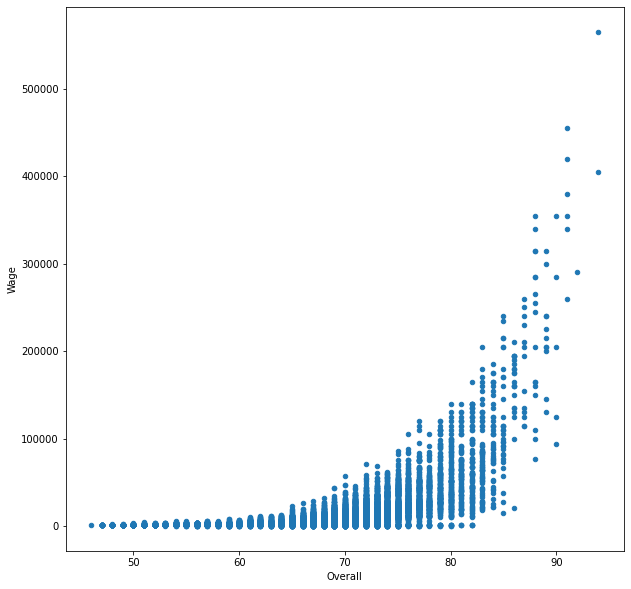

In [18]:
fifa.plot.scatter(x = 'Overall', y = 'Wage', figsize = (10, 10))

In [19]:
# 1)	Отдельные игроков, которым платят значительно больше за их рейтинг согласно графику зависимости
fifa_high_paid = fifa[fifa['Wage'] > 350000]
fifa_high_paid['Name']

0              L. Messi
1     Cristiano Ronaldo
4          K. De Bruyne
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
11             T. Kroos
36              G. Bale
Name: Name, dtype: object

In [20]:
# 1)	Отдельные игроков, которым платят значительно меньше за их рейтинг согласно графику зависимости
fifa_low_paid = fifa[fifa['Wage'] == 1000]
fifa_low_paid['Name'].head(10)

276     Mário Fernandes
286              Taison
288              Marlos
301          V. Ćorluka
381           F. Smolov
386          B. Höwedes
405    Manuel Fernandes
453       T. Stepanenko
473             Ismaily
484        Y. Rakitskyi
Name: Name, dtype: object

In [21]:
# 2)	Отдельных клубы, которые платят значительно больше за рейтинг их игроков согласно графику
list(fifa_high_paid['Club'].unique())

['FC Barcelona', 'Juventus', 'Manchester City', 'Real Madrid']

In [22]:
# 2)	Отдельных клубы, которые платят значительно меньше за рейтинг их игроков согласно графику
list(fifa_low_paid['Club'].head(10).unique())

['PFC CSKA Moscow', 'Shakhtar Donetsk', 'Lokomotiv Moscow']

In [23]:
# 3)	Отдельные национальности игроков, которые недооценены согласно графику
list(fifa_high_paid['Nationality'].unique())

['Argentina',
 'Portugal',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Spain',
 'Germany',
 'Wales']

In [24]:
# 3)	Отдельные национальности игроков, которые переоценены согласно графику
list(fifa_low_paid['Nationality'].head(10).unique())

['Russia', 'Brazil', 'Ukraine', 'Croatia', 'Germany', 'Portugal']

Задание 2. Попытайтесь построить гипотезу, объясняющую каким образом формируется рыночная стоимость игроков и проверьте её

In [25]:
# Предположим, что стоимость игрока зависит от следующих факторов
fifa_choose = fifa[['International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Value']]

In [26]:
# Переводим стоимость в числовой формат
fifa_choose['Value'] = fifa_choose['Value'].apply(changeToNum)

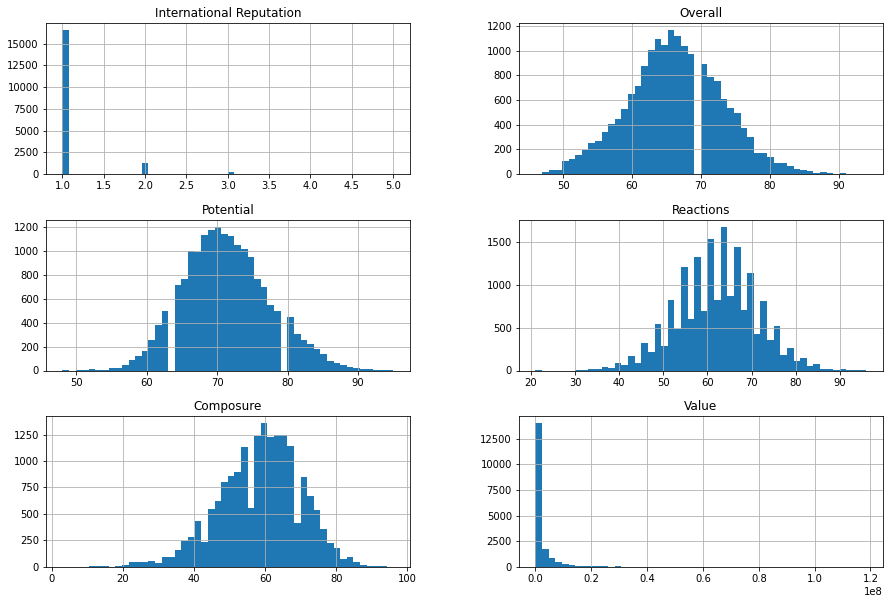

In [27]:
# Проверим распределения атрибутов
fifa_choose.hist(bins = 50, figsize=(15, 10))
plt.show()

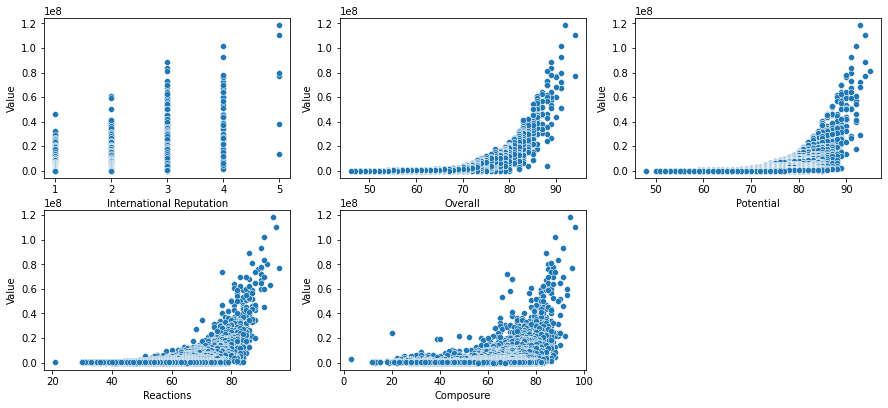

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
sns.scatterplot(fifa_choose['International Reputation'], fifa_choose['Value'])

plt.subplot(3, 3, 2)
sns.scatterplot(fifa_choose['Overall'], fifa_choose['Value'])

plt.subplot(3, 3, 3)
sns.scatterplot(fifa_choose['Potential'], fifa_choose['Value'])

plt.subplot(3, 3, 4)
sns.scatterplot(fifa_choose['Reactions'], fifa_choose['Value'])

plt.subplot(3, 3, 5)
sns.scatterplot(fifa_choose['Composure'], fifa_choose['Value'])

In [29]:
# Проверяем атрбуты на корреляцию и влияние на стоимость игрока. 
# Из таблицы наблюдается умеренная и заметная корреляция. Выбранные атрибуты могут использоваться для определения стоимости игрока.
fifa_choose.corr()

,International Reputation,Overall,Potential,Reactions,Composure,Value
International Reputation,1.000000,0.499491,0.372993,0.445614,0.392787,0.653176
Overall,0.499491,1.000000,0.660939,0.850045,0.727655,0.627085
Potential,0.372993,0.660939,1.000000,0.513425,0.440008,0.576218
Reactions,0.445614,0.850045,0.513425,1.000000,0.685558,0.540552
Composure,0.392787,0.727655,0.440008,0.685558,1.000000,0.450352
Value,0.653176,0.627085,0.576218,0.540552,0.450352,1.000000
